In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## GET THE DATA

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# on disk
HOUSING_PATH = os.path.join('datasets', 'housing')

In [7]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## INSPECT THE DATA

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


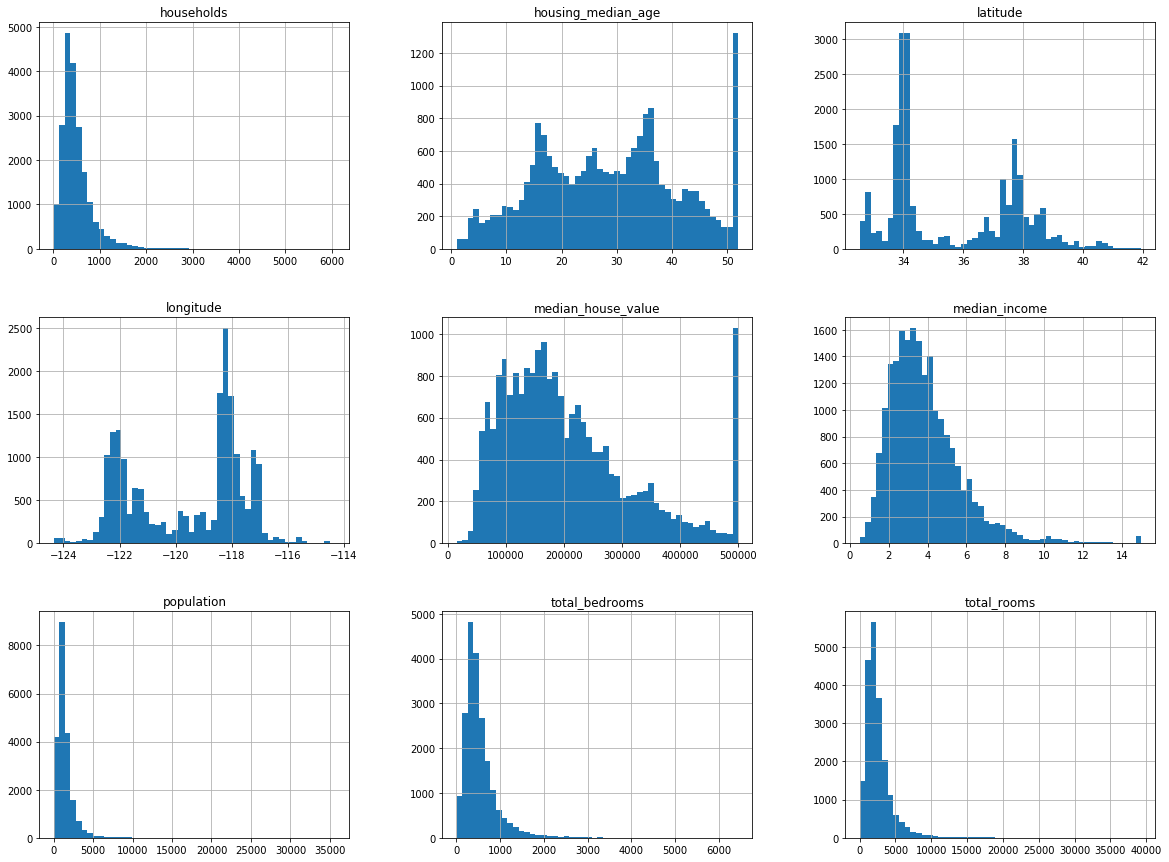

In [5]:
housing.hist(bins=50, figsize=(20,15)) # plots numerical columns
plt.show()

## CREATE THE TEST SET

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]



### RANDOM SAMPLING

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### STRATIFIED SAMPLING

In [13]:
# stratified sampling based on median income
# median income is an important attribute in determining house pricing
# stratified sampling ensures that the test test is a representative of the whole set

#median income categories
# housing['income_cat'] = np.round(housing['median_income']/1.5)
# housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

# housing['median_income'].plot.hist(figsize=(10,10), grid=False)
# plt.show()

housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

# using sklearns stratified sampling method
from sklearn.model_selection import StratifiedShuffleSplit

Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in Split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    


In [7]:
print('Full dataset distro of median income strata:\n{}\n'.format(housing["income_cat"].value_counts()/len(housing)))

print('Strat split distro of median income strata:\n{}\n'.format(strat_train_set['income_cat'].value_counts()/len(strat_train_set)))

Full dataset distro of median income strata:
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Strat split distro of median income strata:
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64



In [ ]:
# drop income_cat column because it's not needed
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [15]:
X_train = strat_train_set.copy()

In [40]:
X_train.shape

(16512, 10)

### DATA VISUALIZATION

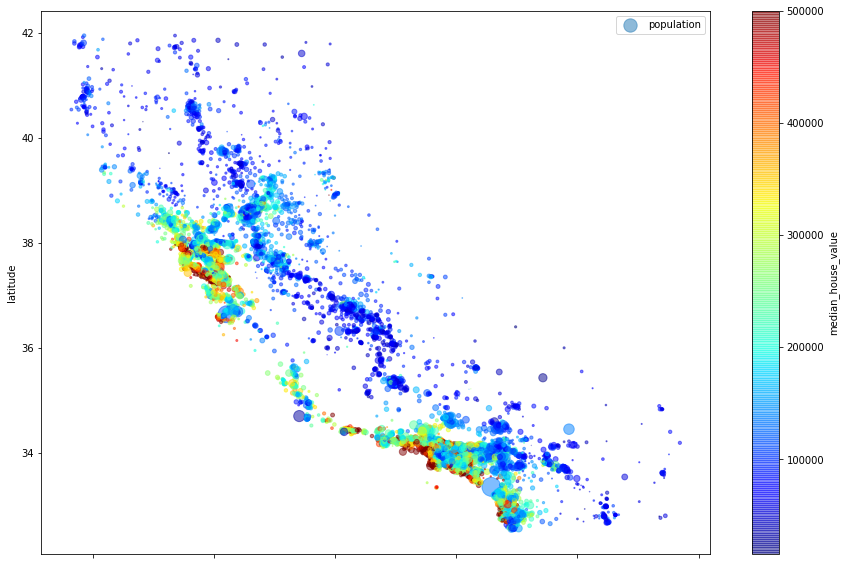

In [19]:


# s=radius of circle
# c=median_house_values in color
# geographical plot because the dimensions are the lat and longitude

X_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
            s=housing['population']/100, label='population',
            c='median_house_value',
            cmap=plt.get_cmap('jet'), figsize=(15,10), colorbar=True)
plt.legend()

### LOOKING FOR CORRELATIONS

In [18]:
corr_matrix = X_train.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688644
total_rooms           0.133591
housing_median_age    0.105001
households            0.067093
total_bedrooms        0.052182
population           -0.023995
longitude            -0.047418
latitude             -0.144151
Name: median_house_value, dtype: float64

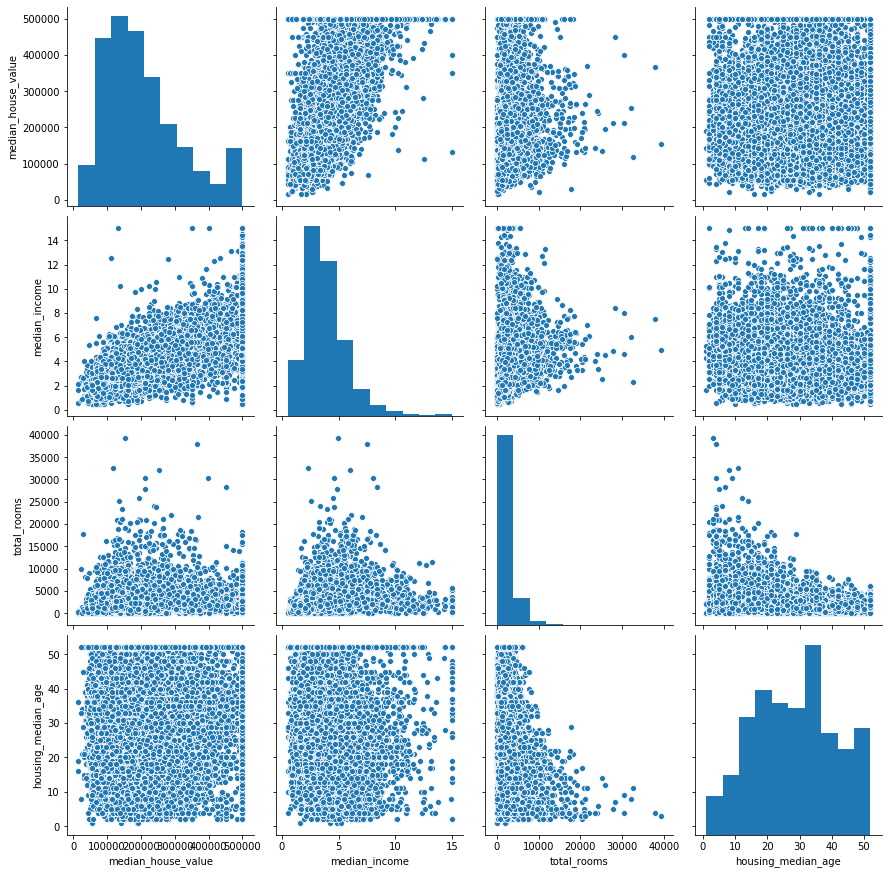

In [19]:
import seaborn as sns
attributes=["median_house_value","median_income","total_rooms","housing_median_age"] 
sns.pairplot(housing[attributes], height=3)

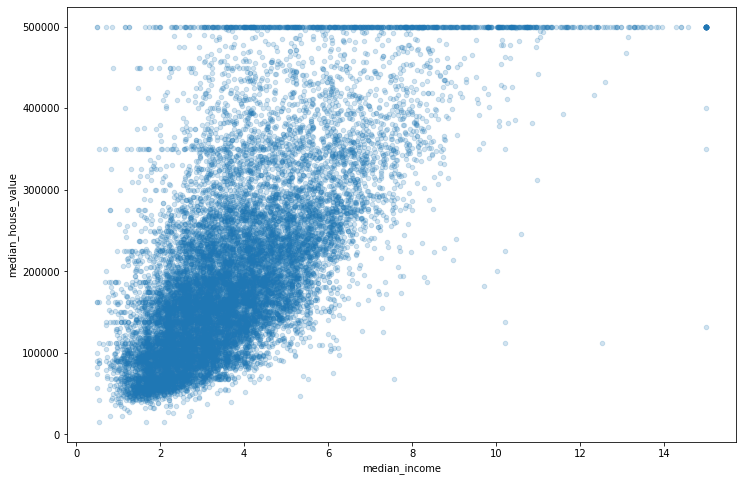

In [12]:
# this shows a strong correlation btw both attributes in dataset
housing.plot(kind='scatter', 
             x='median_income',y='median_house_value',
             figsize=(12,8),
             alpha=0.2)

### Experimenting with Attribute Combinations

In [26]:
# involves combining a few attributes to get more insight into the data set that could help with training

In [22]:
X_train['rooms_per_household'] = X_train['total_rooms']/X_train['households']
X_train['bedrooms_per_room'] = X_train['total_bedrooms']/X_train['total_rooms']
X_train['population_per_household'] = X_train['population']/X_train['households']

In [23]:
corr_matrix = X_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688644
rooms_per_household         0.149834
total_rooms                 0.133591
housing_median_age          0.105001
households                  0.067093
total_bedrooms              0.052182
population_per_household   -0.022433
population                 -0.023995
longitude                  -0.047418
latitude                   -0.144151
bedrooms_per_room          -0.251358
Name: median_house_value, dtype: float64

In [29]:
# notice that newly formed attribute is negatively MORE correlated with median_house_value

# Preparing the data for ML algorithm

## Data cleaning

### 1. Handling the numerical data

In [30]:
# invovles filling missing values or removing attributes with missing/null values in dataset
# Separate the predictors from the label in order to prevent same transformation on the labels
# separating stratified dataset

In [42]:
y_train = strat_train_set['median_house_value'] # labels
X_train_num = strat_train_set.drop(['ocean_proximity', 'median_house_value'], axis=1) # we need to separate the numerical columns and predictors
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [32]:
# transformation -> using median values to fill null values in total bedrooms column

In [33]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

##### or using IMPUTER

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [19]:
imputer.fit(housing_num)
imputer.statistics_ # shows the array of trained median values of the numerical columns

array([-118.51 ,   34.27 ,   29.   , 2122.   ,  434.   , 1163.   ,
        409.   ,    3.536])

In [21]:
# filling the missing values
# returns transformed data in ndarray
X = imputer.transform(housing_num)

# convert bact to DataFrame obj
housing_transfromed = pd.DataFrame(X, columns=housing_num.columns) 

### 2. Handling Text and Categorical Attributes

In [37]:
# encode each category to a class, then onehot encode the classes

##### Long Method

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing[['ocean_proximity']]
# housing_cat_encoded = encoder.fit_transform(housing_cat)
# housing_cat_encoded


In [11]:
print('{}\n'.format(type(housing_cat)))
print('{}\n'.format(type(housing['ocean_proximity'])))

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.series.Series'>



In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[['ocean_proximity']]
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [43]:
X_train_num.shape

(16512, 8)

In [95]:
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

##### Short Method

In [40]:
# TEXT CATEGORIES -> INTEGER CATEGORIES -> 1HOT VECOTRS

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
np.c_

In [39]:
X_train_num.values # returns the feautures in a dataset

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

### Creating a custom transformer

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, populaltion_ix, household_ix = 3, 4, 5, 6 # FOR np.c_ method

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    # the transform method helps us with the combined attribute operation we did earlier
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:, populaltion_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

###### custom transfomrer to select important attributes

In [124]:
# SELECTOR function for FEATURE UNION
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# had to program my label binarizer =======> NOT REALLY NEEDED AGAIN
# class MyLabelBinarizer(BaseEstimator, TransformerMixin):
#     def __init__(self, sparse_output=False):
#         self.sparse_output = sparse_output
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None):
#         encoder = LabelBinarizer(sparse_output=self.sparse_output)
#         return encoder.fit_transform(X)
    
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, **important_attribs):
        self.attribs = important_attribs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribs]


In [138]:
StandardScaler().fit_transform(X_train[['median_income', 'longitude', 'latitude']])

array([[-0.61493744, -1.15604281,  0.77194962],
       [ 1.33645936, -1.17602483,  0.6596948 ],
       [-0.5320456 ,  1.18684903, -1.34218285],
       ...,
       [-0.3167053 ,  1.58648943, -0.72478134],
       [ 0.09812139,  0.78221312, -0.85106801],
       [-0.15779865, -1.43579109,  0.99645926]])

## Transformation Pipeline

Helps aggregate all the preprocessing(categorical/text and numerical data) on the dataset into a pipeline of operations

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# STANDARD SCALAR IS A STANDARDIZATION FEATURE SCALING

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
# housing_num_tr = num_pipeline.fit_transform(housing_num) # transformed numerical housing data object

In [ ]:
housing_num_tr

In [ ]:
housing_num_tr.shape

In [27]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

### Categorical & Numerical Transformer pipelines COMBINATION

In [48]:
# using FeatureUnion Library

In [88]:
# from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_attributes = list(X_train.drop(['ocean_proximity', 'median_house_value'], axis=1))
cat_attributes = ['ocean_proximity']
imp_attributes = []

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])


full_pipeline = ColumnTransformer([('num', num_pipeline, num_attributes),
                                   ('cat', OneHotEncoder(), cat_attributes)  
                                  ], remainder='drop')

In [90]:
X_train_prep = full_pipeline.fit_transform(X_train) # output: a numpy array of data
print('{}\n\n{}\n'.format(X_train_prep.shape, X_train_prep))

(16512, 16)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]



In [56]:
print(X_train_prep[0])

[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
  0.          0.          0.          0.        ]


## Training and Evaluating on the Train Set

### Model selection and testing - tryout different models

##### LinearRegressor

In [52]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
some_data = housing_prepared[:5]
some_labels = housing_labels[:5]
# some_data_prepared = full_pipeline.transform(some_data)


In [54]:
print("Predictions:\t", lin_model.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [92]:
from sklearn.metrics import  mean_squared_error
lin_predictions = lin_model.predict(housing_prepared)
mse = mean_squared_error(housing_labels, lin_predictions)
rmse = np.sqrt(mse)
rmse

68628.19819848923

In [56]:
# not good enough rmse. poor rmse; try another model

##### DecisionTreeRegressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prep, y_train)

tree_predictions = tree_reg.predict(X_train_prep)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [72]:
# notice the decision tree regressor overfits to the training set

# K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [75]:
# ERROR DISPLAY FUNC

def display_scores(scores):
    print("Scores: {}\n".format(scores))
    print("Mean: {}\n".format(scores.mean()))
    print("Standard deviation {}\n".format(scores.std()))

In [73]:
# the tree model overfits the training set
# it performs poorly on new examples

display_scores(tree_rmse_scores)

Scores: [70734.54826211 71527.05910143 72961.10369568 69984.56995236
 67698.34013098 67786.11339371 68506.66107876 71926.00414907
 70179.52830255 72646.85650174]

Mean: 70395.07845683882

Standard deviation 1823.6101251986363



##### Ensemble Learning with RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prep, y_train)
forest_predictions = forest_reg.predict(X_train_prep)

In [79]:
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import cross_val_score
# EVALUATION
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print('{}\n'.format(forest_rmse))

18603.515021376355



In [80]:
# CROSS VALIDATION
scores = cross_val_score(forest_reg, X_train_prep, y_train,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]

Mean: 50182.303100336096

Standard deviation 2097.0810550985693



###### SupportVectorMachines Regressor

In [93]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1000000)

svr_model.fit(X_train_prep, y_train)
svr_predictions = svr_model.predict(X_test_prepared)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

52783.15285898123

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr_model, X_train_prep, y_train, scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-scores)

In [96]:
display_scores(svr_rmse_scores)

Scores: [54996.18659419 53110.61355688 55336.78708359 55619.7501554
 54810.26945175 57881.13951803 51554.5580354  53202.5062214
 57139.52893755 54924.40086846]

Mean: 54857.57404226598

Standard deviation 1785.686872215887



In [97]:
# MODEL SAVER USING SKLEARN

import joblib
def save_model(model, path_name):
    joblib.dump(model, path_name)
    
def load_model(path_name):
    return joblib.load(path_name)

In [71]:
save_model(lin_model, 'linearModel.pkl')
save_model(tree_reg, 'decisionTreeRegressor.pkl')
save_model(forest_reg, 'randomForestRegressor.pkl')

### Fine tuning the model

In [36]:
# finding the optimal hyperparameters combination for the random forest model

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# specify the hyperparameters to combine
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42) # notice we use random forests

grid_search = GridSearchCV(forest_reg,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           refit=True
                          )

grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [58]:
print('Best Paramaters:\n{}\n\nBest Estimator:\n{}\n'.format(grid_search.best_params_, grid_search.best_estimator_))

Best Paramaters:
{'max_features': 8, 'n_estimators': 30}

Best Estimator:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)



In [41]:
# to see the scores
cvres = grid_search.cv_results_
for mean_score, params  in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63973.20039102712 {'max_features': 2, 'n_estimators': 3}
55583.26002144446 {'max_features': 2, 'n_estimators': 10}
52406.090504069616 {'max_features': 2, 'n_estimators': 30}
60183.63533678281 {'max_features': 4, 'n_estimators': 3}
51600.15643241066 {'max_features': 4, 'n_estimators': 10}
50198.97077826649 {'max_features': 4, 'n_estimators': 30}
60441.762772107955 {'max_features': 6, 'n_estimators': 3}
52338.59475442479 {'max_features': 6, 'n_estimators': 10}
49681.79277643868 {'max_features': 6, 'n_estimators': 30}
58228.74659262834 {'max_features': 8, 'n_estimators': 3}
52346.220065828835 {'max_features': 8, 'n_estimators': 10}
49782.077520033796 {'max_features': 8, 'n_estimators': 30}
60580.63036770289 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53648.6115454454 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60886.34280648608 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51817.016206992295 {'bootstrap': False, 'max_features': 3, 'n_estimators'

##### Best Model

In [69]:
# view relative importances of the attributes in the best model

feature_importances = grid_search.best_estimator_.feature_importances_

In [43]:
full_pipeline.named_transformers_

{'num': Pipeline(memory=None,
          steps=[('imputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='median',
                                verbose=0)),
                 ('attribs_adder',
                  CombinedAttributesAdder(add_bedrooms_per_room=True)),
                 ('std_scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True))],
          verbose=False),
 'cat': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 'remainder': 'drop'}

In [70]:
extra_attribs = ['rooms_per_bedroom', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0]) # access the labels of the categorical attribute
attributes = num_attributes + extra_attribs + cat_one_hot_attribs

# view the relative importance of each attribute
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_bedroom'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [31]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

### Evaluating the system on the test set

In [86]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_

X_test = strat_test_set.copy()
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

# modified X_test_prepared by adding zeros 
# X_test_prep_modified = pd.concat([pd.DataFrame(X_test_prepared), pd.DataFrame(np.zeros((X_test_prepared.shape[0], 1)))], 
#                                  ignore_index=True, axis=1).values


final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

In [87]:
print('Untransformed test set shape: {}\nTransformed test set shape: {}\n'.format(X_test.shape, X_test_prepared.shape))

Untransformed test set shape: (4128, 10)
Transformed test set shape: (4128, 16)



In [101]:
save_model(final_model, path_name='final_model.pkl')

##### using a confidence interval

In [95]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

In [41]:
svr_pred_train = svr_model.predict(housing_prepared)
svr_mse = mean_squared_error(svr_pred_train, y_train)
print('RMSE on train set: {}\n'.format(np.sqrt(svr_mse)))

RMSE on train set: 50720.64675687794



## Exercises

In [119]:
list(X_train['ocean_proximity'].value_counts().drop('INLAND').index)

['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [134]:
list(X_train_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# custom transformer
class ReplaceFeatures(TransformerMixin, BaseEstimator):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.replace(self.cat_features, '~INLAND')

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, important_attribs):
        self.attribs = important_attribs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribs]


    
num_attributes = list(X_train_num)
cat_attributes = ['ocean_proximity']
imp_attributes = ['median_income', 'longitude', 'latitude', 'population_per_household']
useless_features = list(X_train['ocean_proximity'].value_counts().drop('INLAND').index)


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('imp_attribs', AttributeSelector(imp_attributes)),
                         ('standard_scaler', StandardScaler()),
])

full_pipeline_II = ColumnTransformer([('num_1', num_pipeline, num_attributes),
                                      ('cat_1', ReplaceFeatures(useless_features), cat_attributes), 
                                      ('cat_2', OneHotEncoder(), cat_attributes)  
])